### Cultivated image segmentation using modified MADs

In [1]:
# must restart kernel for each run (not sure why)

import os
import sys
import glob
import datacube
import xarray as xr
import numpy as np
import scipy
import matplotlib.pyplot as plt
from osgeo import gdal
from datacube.helpers import write_geotiff
from datacube.utils.geometry import CRS
from rsgislib.segmentation import segutils

dc = datacube.Datacube(app="cultivated seg")

#import le_lccs modules
sys.path.append('../../../livingearth_lccs')
from le_lccs.le_ingest import gridded_ingest
from le_lccs.le_classification import lccs_l3

In [2]:
if os.path.exists("test.kea"):
    os.remove("test.kea")
if os.path.exists("test.tif"):
    os.remove("test.tif")
if os.path.exists("test_segmented.kea"):
    os.remove("test_segmented.kea")
if os.path.exists("segments_zonal_mean_shepherdSeg.tif"):
    os.remove("segments_zonal_mean_shepherdSeg.tif")

In [3]:
folder = 'test2/'
res = (-100, 100)
crs = 'EPSG:3577'
time = ('2015-01-01', '2015-12-31')
var_name = 'site'

# Ayr = {'AOI': 'Ayr', 'query': {'x':(1500000, 1600000), 'y':(-2200000, -2100000), 'resolution': res, 'time': time, 'crs': crs}, 'query_geofabric': {'target_min_x': 1500000, 'target_max_x': 1600000, 'target_min_y':-2200000, 'target_max_y': -2100000, 'target_pixel_size_x': res[1], 'target_pixel_size_y': res[0], 'target_crs': crs}}
# var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_15_-22.tif"))[2:-2])

# Diamantina = {'AOI': 'Diamantina', 'query': {'x':(800000, 900000), 'y':(-2800000, -2700000), 'resolution': res, 'time': time, 'crs': crs}, 'query_geofabric': {'target_min_x': 800000, 'target_max_x': 900000, 'target_min_y':-2800000, 'target_max_y': -2700000, 'target_pixel_size_x': res[1], 'target_pixel_size_y': res[0], 'target_crs': crs}}
# var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_8_-28.tif"))[2:-2])

# Gwydir = {'AOI': 'Gwydir', 'query': {'x':(1600000, 1700000), 'y':(-3400000, -3300000), 'resolution': res, 'time': time, 'crs': crs}, 'query_geofabric': {'target_min_x': 1600000, 'target_max_x': 1700000, 'target_min_y':-3400000, 'target_max_y': -3300000, 'target_pixel_size_x': res[1], 'target_pixel_size_y': res[0], 'target_crs': crs}}
# var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_16_-34.tif"))[2:-2])

Leichhardt = {'AOI': 'Leichhardt', 'query': {'x':(800000, 900000), 'y':(-2000000, -1900000), 'resolution': res, 'time': time, 'crs': crs}, 'query_geofabric': {'target_min_x': 800000, 'target_max_x': 900000, 'target_min_y':-2000000, 'target_max_y': -1900000, 'target_pixel_size_x': res[1], 'target_pixel_size_y': res[0], 'target_crs': crs}}
var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_8_-20.tif"))[2:-2])

# Kakadu = {'AOI': 'Kakadu', 'query': {'x':(0, 100000), 'y':(-1350000, -1250000), 'resolution': res, 'time': time, 'crs': crs}, 'query_geofabric': {'target_min_x': 0, 'target_max_x': 100000, 'target_min_y':-1350000, 'target_max_y': -1250000, 'target_pixel_size_x': res[1], 'target_pixel_size_y': res[0], 'target_crs': crs}}
# var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_0_-14.tif"))[2:-2])

# Hobart = {'AOI': 'Hobart', 'query': {'x':(1200000, 1300000), 'y':(-4800000, -4700000), 'resolution': res, 'time': time, 'crs': crs}, 'query_geofabric': {'target_min_x': 1200000, 'target_max_x': 1300000, 'target_min_y':-4800000, 'target_max_y': -4700000, 'target_pixel_size_x': res[1], 'target_pixel_size_y': res[0], 'target_crs': crs}}
# var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_12_-48.tif"))[2:-2])

# Perth = {'AOI': 'Perth', 'query': {'x':(-1550000, -1450000), 'y':(-3650000, -3550000), 'resolution': res, 'time': time, 'crs': crs}, 'query_geofabric': {'target_min_x': -1550000, 'target_max_x': -1450000, 'target_min_y':-3650000, 'target_max_y': -3550000, 'target_pixel_size_x': res[1], 'target_pixel_size_y': res[0], 'target_crs': crs}}

# Murray_Valley = {'AOI': 'Murray_Valley', 'query': {'x':(1100000, 1200000), 'y':(-4000000, -3900000), 'resolution': res, 'time': time, 'crs': crs}, 'query_geofabric': {'target_min_x': 1100000, 'target_max_x': 1200000, 'target_min_y':-4000000, 'target_max_y': -3900000, 'target_pixel_size_x': res[1], 'target_pixel_size_y': res[0], 'target_crs': crs}}
# var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_11_-40.tif"))[2:-2])

# Adelaide = {'AOI': 'Adelaide', 'query': {'x':(550000, 650000), 'y':(-3850000, -3750000), 'resolution': res, 'time': time, 'crs': crs}, 'query_geofabric': {'target_min_x': 550000, 'target_max_x': 650000, 'target_min_y':-3850000, 'target_max_y': -3750000, 'target_pixel_size_x': res[1], 'target_pixel_size_y': res[0], 'target_crs': crs}}

# Lake_Eyre = {'AOI': 'Lake_Eyre', 'query': {'x':(500000, 600000), 'y':(-3000000, -2900000), 'resolution': res, 'time': time, 'crs': crs}, 'query_geofabric': {'target_min_x': 500000, 'target_max_x': 600000, 'target_min_y':-3000000, 'target_max_y': -2900000, 'target_pixel_size_x': res[1], 'target_pixel_size_y': res[0], 'target_crs': crs}}
# var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_5_-30.tif"))[2:-2])

# Blue_Mtns = {'AOI': 'Blue_Mtns', 'query': {'x':(1600000, 1700000), 'y':(-3900000, -3800000), 'resolution': res, 'time': time, 'crs': crs}, 'query_geofabric': {'target_min_x': 1600000, 'target_max_x': 1700000, 'target_min_y':-3900000, 'target_max_y': -3800000, 'target_pixel_size_x': res[1], 'target_pixel_size_y': res[0], 'target_crs': crs}}
# var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_16_-39.tif"))[2:-2])

# Aust_Alps = {'AOI': 'Aust_Alps', 'query': {'x':(1400000, 1500000), 'y':(-4100000, -4000000), 'resolution': res, 'time': time, 'crs': crs}, 'query_geofabric': {'target_min_x': 1400000, 'target_max_x': 1500000, 'target_min_y':-4100000, 'target_max_y': -4000000, 'target_pixel_size_x': res[1], 'target_pixel_size_y': res[0], 'target_crs': crs}}
# var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_14_-41.tif"))[2:-2])

# Collier_Range = {'AOI': 'Collier_Range', 'query': {'x':(-1300000, -1200000), 'y':(-2700000, -2600000), 'resolution': res, 'time': time, 'crs': crs}, 'query_geofabric': {'target_min_x': -1300000, 'target_max_x': -1200000, 'target_min_y':-2700000, 'target_max_y': -2600000, 'target_pixel_size_x': res[1], 'target_pixel_size_y': res[0], 'target_crs': crs}}
# var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_-13_-27.tif"))[2:-2])

# Coorong = {'AOI': 'Coorong', 'query': {'x':(600000, 700000), 'y':(-3950000, -3850000), 'resolution': res, 'time': time, 'crs': crs}, 'query_geofabric': {'target_min_x': 600000, 'target_max_x': 700000, 'target_min_y':-3950000, 'target_max_y': -3850000, 'target_pixel_size_x': res[1], 'target_pixel_size_y': res[0], 'target_crs': crs}}

# Brisbane = {'AOI': 'Brisbane', 'query': {'x':(2000000, 2100000), 'y':(-3200000, -3100000), 'resolution': res, 'time': time, 'crs': crs}, 'query_geofabric': {'target_min_x':2000000, 'target_max_x': 2100000, 'target_min_y':-3200000, 'target_max_y': -3100000, 'target_pixel_size_x': res[1], 'target_pixel_size_y': res[0], 'target_crs': crs}}
# var_file = (str(glob.glob("/g/data/r78/LCCS_Aberystwyth/co6850/datacube-2nd-order-stats/"+folder+"*_20_-32.tif"))[2:-2])

# Mt_Ney = {'AOI': 'Mt_Ney', 'query': {'x':(-1000000, -900000), 'y':(-3650000, -3550000), 'resolution': res, 'time': time, 'crs': crs}, 'query_geofabric': {'target_min_x':-1000000, 'target_max_x': -900000, 'target_min_y':-3650000, 'target_max_y': -3550000, 'target_pixel_size_x': res[1], 'target_pixel_size_y': res[0], 'target_crs': crs}}


site = Leichhardt


import_obj = gridded_ingest.LEIngestGDAL(**site['query_geofabric'])
site = import_obj.read_to_xarray(var_file, var_name, band=2)
site.attrs['crs'] = CRS('EPSG:3577')




In [4]:
site.site.plot.imshow(figsize=(12, 10), robust=True)

In [5]:
# Shephard et al. (2019)

# Name of the GeoTIFF to export then and segment
tiff_to_segment = 'test.tif' 

# Name of the .kea file the GeoTIFF will be converted too
kea_file = 'test.kea'

# Name of the segmented .kea file that will be output 
segmented_kea_file = 'test_segmented.kea'

# Name of the segmented GeoTIFF attributed with the zonal mean of input file
segments_zonal_mean = 'segments_zonal_mean_shepherdSeg.tif'


In [6]:
# Write the mean NDVI dataset to be written to file as a GeoTIFF
write_geotiff(filename=tiff_to_segment, dataset=site[['site']])

# Convert the GeoTIFF into a KEA file format
gdal.Translate(destName=kea_file,
               srcDS=tiff_to_segment,
               format='KEA',
               outputSRS='EPSG:3577')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f75194e3de0> >

In [7]:
# Run the image segmentation
segutils.runShepherdSegmentation(inputImg=kea_file,
                                 outputClumps=segmented_kea_file,
                                 outputMeanImg=segments_zonal_mean,
                                 numClusters=10,
                                 minPxls=100)

Stretch Input Image
Add 1 to stretched file to ensure there are no all zeros (i.e., no data) regions created.
Create Input Image Mask.
Mask stretched Image.
Deleting file: ./test_stchdonly.kea
Deleting file: ./test_stchdonlyOff.kea
Deleting file: ./test_stchdmaskonly.kea
Performing KMeans.
Apply KMeans to image.
Eliminate Single Pixels.
Perform clump.
Eliminate small pixels.
Relabel clumps.
Calculate image statistics and build pyramids.
Deleting file: ./test_kmeansclusters.gmtxt
Deleting file: ./test_kmeans.kea.aux.xml
Deleting file: ./test_kmeans.kea
Deleting file: ./test_kmeans_nosgl.kea
Deleting file: ./test_kmeans_nosglTMP.kea
Deleting file: ./test_clumps.kea
Deleting file: ./test_clumps_elim.kea
Deleting file: ./test_stchd.kea


In [8]:
# Open and plot the segments attributed with zonal mean
result = xr.open_rasterio(segments_zonal_mean)
result.plot(figsize=(12, 10), cmap='gist_earth_r')

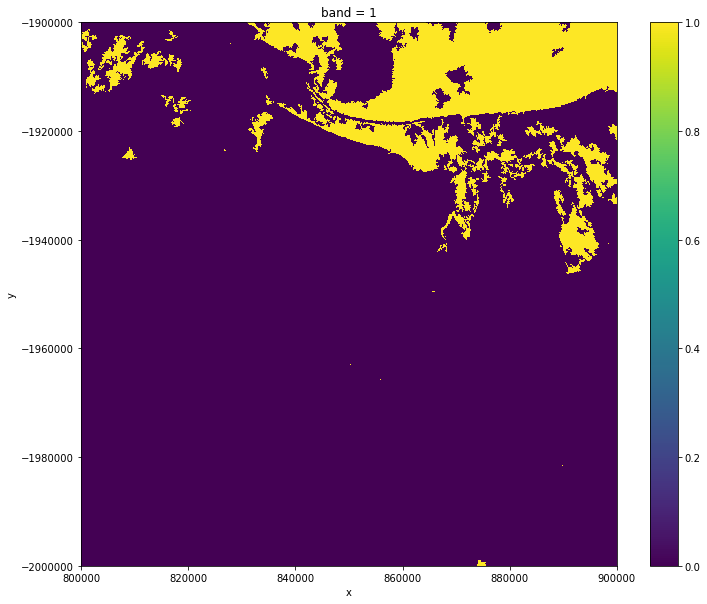

In [9]:
result = result < 3
result.plot(figsize=(12, 10))

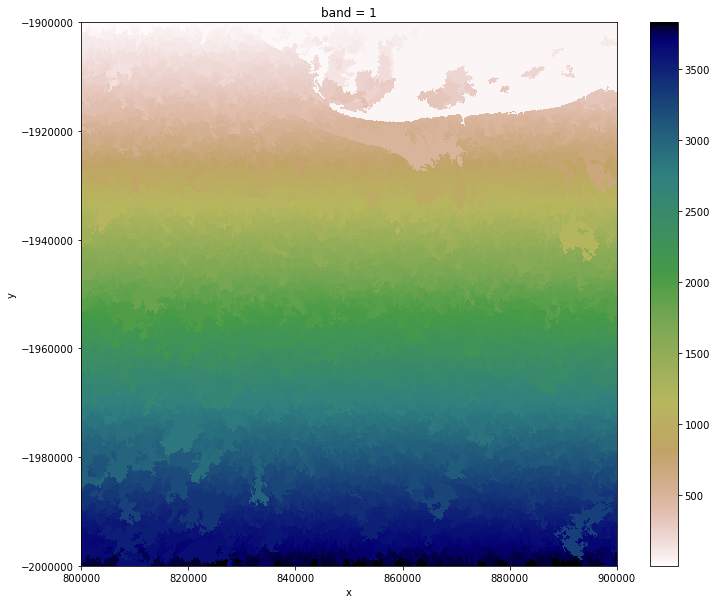

In [10]:
result = xr.open_rasterio(segmented_kea_file)
result.plot(figsize=(12, 10), cmap='gist_earth_r')